In [1]:
import torch
from torch.autograd import Variable

import torch.nn as nn
import torch.nn.functional as F

In [2]:
torch.manual_seed(4)
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
x=torch.linspace(-5,5,200)
x=Variable(x)

x_np=x.data.numpy()

In [20]:
# y_relu=F.relu(x).data.numpy()
# y_sig=F.sigmoid(x).data.numpy()
# y_tanh=F.tanh(x).data.numpy()
# y_softplus=F.softplus(x).data.numpy()


## Data generation

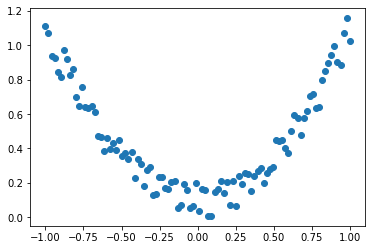

In [6]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
y = x.pow(2) + 0.2*torch.rand(x.size())
x, y = Variable(x), Variable(y)

plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()


In [5]:
## A simple Non-Linear Model

In [7]:
layer=nn.Linear(1,20,bias=True)

activation=nn.ReLU()

output=nn.Linear(20,1,bias=True)


In [8]:
net=nn.Sequential(layer,activation,output)

In [10]:
optimizer=torch.optim.Adam(net.parameters(),lr=0.01)
loss_func=torch.nn.MSELoss()

C:\Users\vivek\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\vivek\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [11]:
## Train a model

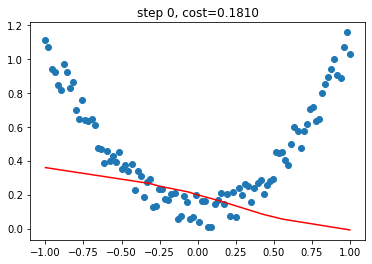

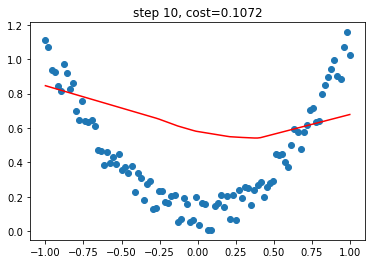

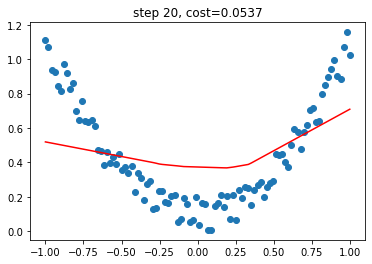

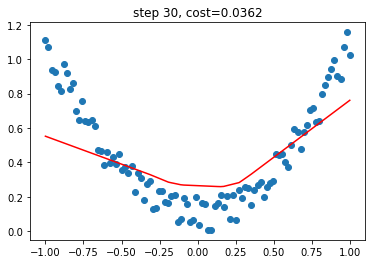

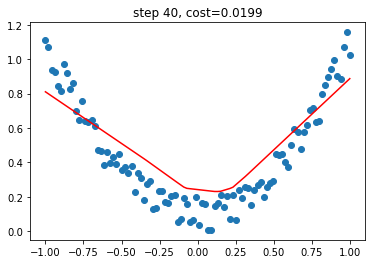

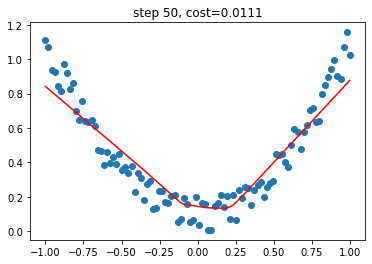

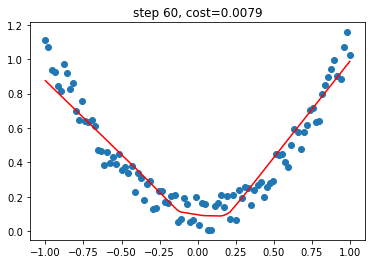

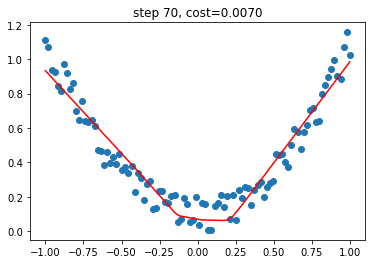

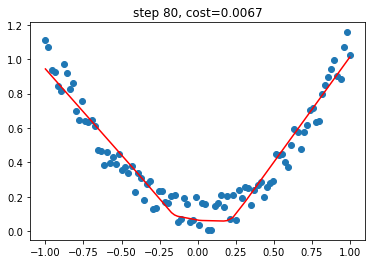

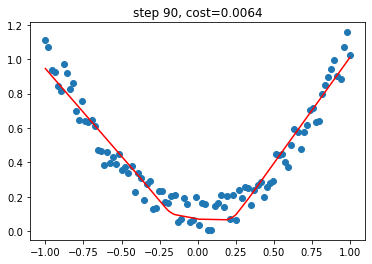

In [16]:
for i in range(100):
    pred=net(x)
    optimizer.zero_grad()
    loss=loss_func(pred,y)
    loss.backward()
    optimizer.step()
    
    if i % 10 == 0:
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), pred.data.numpy(), 'r-')
        plt.title('step %d, cost=%.4f' %  (i,loss.data))
        plt.show()

In [17]:
## Save the model

In [19]:
torch.save(net.state_dict(), './nonlinear.pkl')
net.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.9021],
                      [ 1.3015],
                      [ 0.5784],
                      [ 0.0918],
                      [-0.4010],
                      [ 0.1833],
                      [-1.3659],
                      [-0.2803],
                      [-0.1294],
                      [-0.0688],
                      [ 0.2608],
                      [ 0.1783],
                      [-0.6353],
                      [-0.0981],
                      [-0.0247],
                      [ 0.5686],
                      [-0.0733],
                      [-0.7017],
                      [ 0.5397],
                      [ 0.9638]])),
             ('0.bias',
              tensor([ 0.0074, -0.3392,  0.2217,  0.1178,  0.5589, -0.2732, -0.2343,  0.3063,
                      -0.1329,  0.5014, -0.3089,  0.8596, -0.1101, -0.2109,  0.1973, -0.2092,
                       0.7364, -0.1591,  0.6121, -0.1959])),
             ('2.weight',
            